In [1]:
import scipy
import time
import math as m
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd
from scipy import optimize
from scipy import special
from scipy import stats
from scipy import linalg
from multiprocessing import Pool
import matplotlib.path as mpltPath
from numba import njit
from scipy import interpolate
import sys

sys.path.append("..")


from pylab import *
%matplotlib inline

from src.CoreModules import Spectrum as sp
from src.CoreModules import Wavefunctions as wf
from src.BilliardModules import Polygon as poly
from src.BasisModules import FourierBessel as fb

rc('text', usetex=True)
rc('font', size = 10)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc('axes', labelsize='medium')
rc('legend', fontsize='small')
rc('figure', figsize=(8.6/2.54, 8.6/2.54*0.75))
rc('lines', linewidth=1.5)
rcParams["axes.formatter.limits"] = (-3,4) 

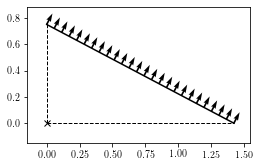

In [2]:
alpha = (np.sqrt(5)-1)*np.pi/4
beta = (np.pi - alpha)/4
xA, yA = 0.75*np.tan(2*beta), 0
xB, yB = 0, 0.75
xC, yC =  0, 0
x = [xA, xB, xC]
y = [yA, yB, yC]
virtual = [False, True, True]

nu  = 2
phi0 = 0
fb_basis = fb.make_FBca_basis(par_list=[{"x0" : 0, "y0" : 0, "nu" : nu, "phi0" :phi0}])

fig = figure(figsize = (4,4))

triangle = poly.make_polygon(x,y,virtual=virtual)
triangle.plot_boundary()
#fb_basis.plot_basis_function(0,1,10)

5.981638669967651 seconds
94.0225157737732 seconds


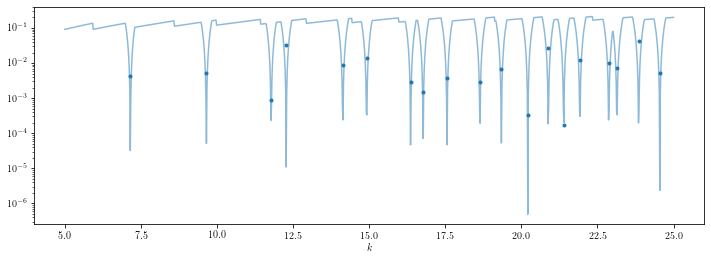

In [3]:
evp_fb = sp.spectrum(triangle, fb_basis)
wf_fb = wf.wavefunctions(triangle, fb_basis)
k1= 5
k2 = 25
grid = 1200

solver = "DM"
b = 5
delta = 5
M = k2*delta/(2*np.pi)

dk = 0.1
overlap = 0.5
tolerance = 1e-3

fig = figure(figsize = (12,4))
start_time = time.time()
spect_fb, ten_fb = evp_fb.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M*5, scale_basis = b*5, return_tensions = True)
print("%s seconds" % (time.time() - start_time))
#pp = {"marker":".", "linestyle":None, "color":'tab:red', "label":"SM RPW","alpha":1}

start_time = time.time()
pp = {"linestyle":"-" , "color":'tab:blue', "label":"DM-FB", "alpha" : 0.5}
ks, ten_dm_fb = evp_fb.plot_tension(k1, k2, solver = solver, grid = grid, plot_params = pp)
print("%s seconds" % (time.time() - start_time))
semilogy(spect_fb, ten_fb, ".", color ='tab:blue', label = "SM-FB")


In [6]:
start_time = time.time()
spect_fb_corr, ten_fb_corr = evp_fb.correct_spectrum( spect_fb, tolerance, solver= "DM", point_density = M, scale_basis = b, eps = 1e-5, return_tensions = True)
print("%s seconds" % (time.time() - start_time))

1.7710812091827393 seconds


18.364403009414673 seconds


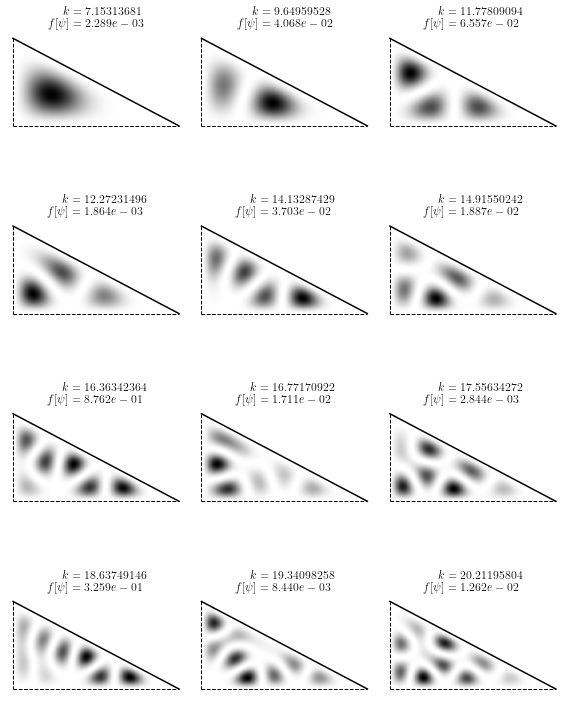

In [7]:
fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect_fb_corr[i]
    t = ten_fb_corr[i]
    wf_fb.plot_probability(k)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

33.36902046203613 seconds


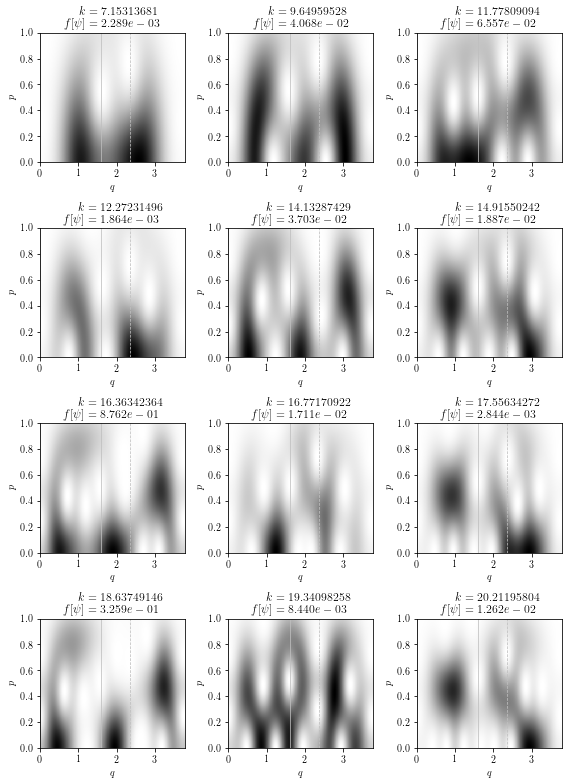

In [8]:
fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect_fb_corr[i]
    t = ten_fb_corr[i]
    wf_fb.plot_Husimi_function(k)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

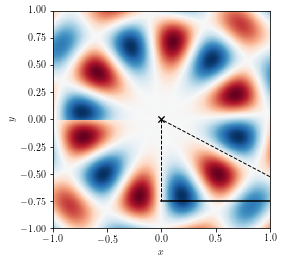

In [2]:

alpha = (np.sqrt(5)-1)*np.pi/4
beta = (np.pi - alpha)/4
xA, yA = 0.75*np.tan(2*beta), -0.75
xB, yB = 0, 0
xC, yC =  0, -0.75
x = [xA, xB, xC]
y = [yA, yB, yC]
virtual = [True, True, False]

nu  = np.pi/(2*beta)
phi0 = -(np.pi/2-2*beta)
fb_basis = fb.make_FBca_basis(par_list=[{"x0" : 0, "y0" : 0, "nu" : nu, "phi0" :phi0}])

fig = figure(figsize = (4,4))

triangle = poly.make_polygon(x,y,virtual=virtual)
triangle.plot_boundary()
fb_basis.plot_basis_function(0,1,10)

5.59859299659729 seconds
92.18142080307007 seconds


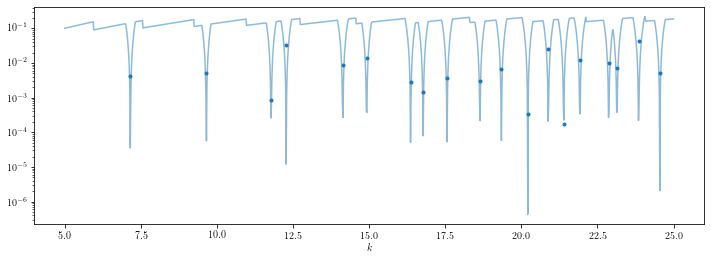

In [3]:
evp_fb = sp.spectrum(triangle, fb_basis)
wf_fb = wf.wavefunctions(triangle, fb_basis)
k1= 5
k2 = 25
grid = 1200

solver = "DM"
b = 5
delta = 5
M = k2*delta/(2*np.pi)
eps = 0.5e-15

dk = 0.1
overlap = 0.5
tolerance = 1e-3

fig = figure(figsize = (12,4))
start_time = time.time()
spect_fb, ten_fb = evp_fb.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M*5, scale_basis = b*5, return_tensions = True)
print("%s seconds" % (time.time() - start_time))
#pp = {"marker":".", "linestyle":None, "color":'tab:red', "label":"SM RPW","alpha":1}

start_time = time.time()
pp = {"linestyle":"-" , "color":'tab:blue', "label":"DM-FB", "alpha" : 0.5}
ks, ten_dm_fb = evp_fb.plot_tension(k1, k2, solver = solver, grid = grid, eps = eps, plot_params = pp)
print("%s seconds" % (time.time() - start_time))
semilogy(spect_fb, ten_fb, ".", color ='tab:blue', label = "SM-FB")


In [4]:
start_time = time.time()
spect_fb_corr, ten_fb_corr = evp_fb.correct_spectrum( spect_fb, tolerance, solver= "DM", point_density = M, scale_basis = b, eps = eps, return_tensions = True)
print("%s seconds" % (time.time() - start_time))

0.939347505569458 seconds


21.68101954460144 seconds


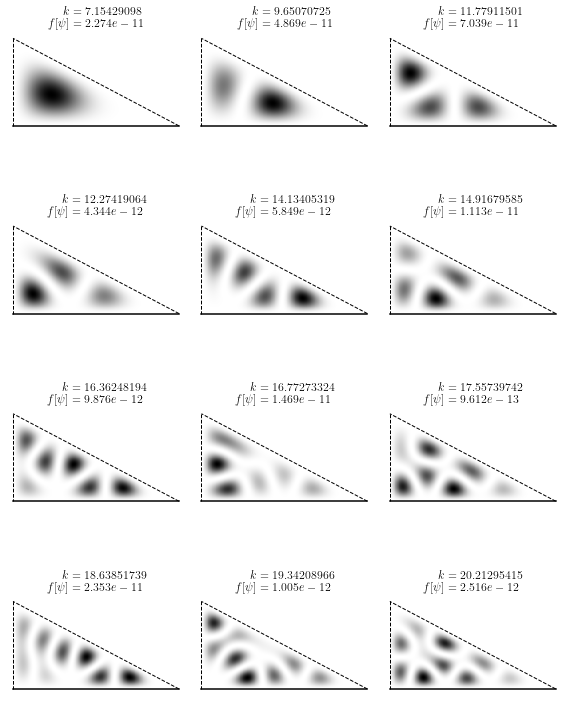

In [5]:
fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect_fb_corr[i]
    t = ten_fb_corr[i]
    wf_fb.plot_probability(k,plot_full=False)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

0.36666297912597656 seconds


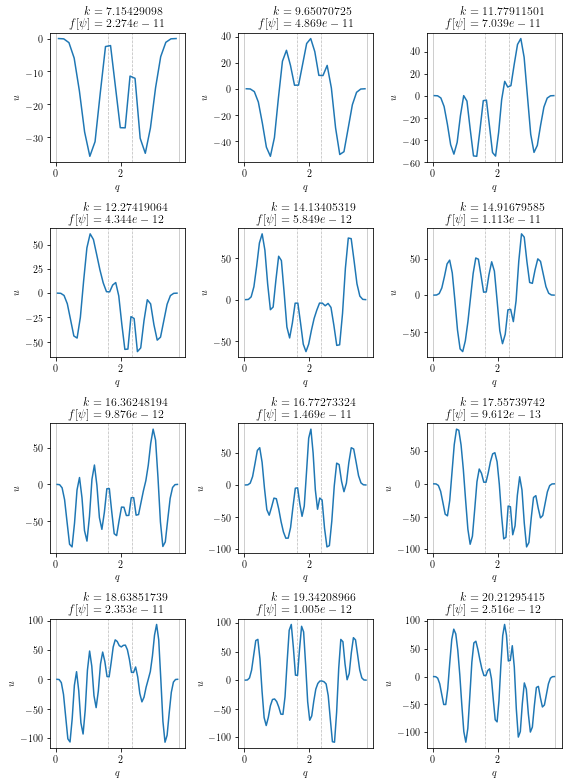

In [6]:
fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect_fb_corr[i]
    t = ten_fb_corr[i]
    wf_fb.plot_boundary_function(k, midpts = True)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

34.223604679107666 seconds


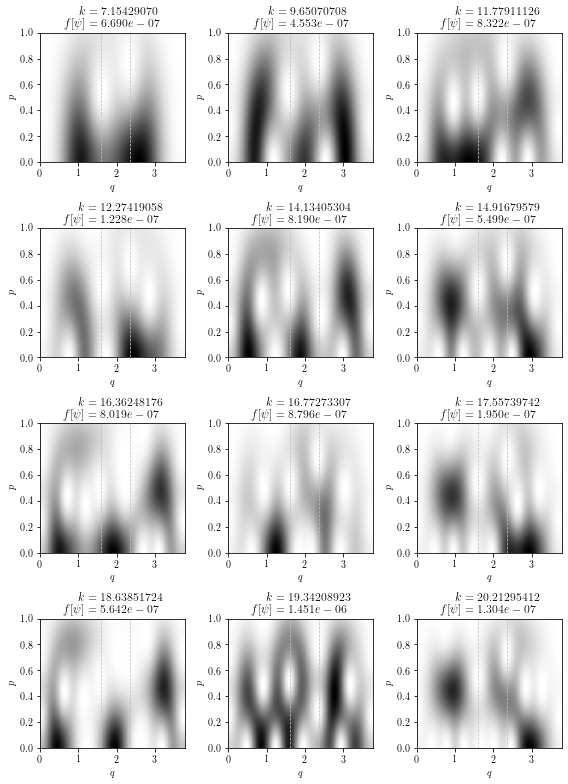

In [14]:
fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect_fb_corr[i]
    t = ten_fb_corr[i]
    wf_fb.plot_Husimi_function(k)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

In [13]:
k0 = 3000
dk = 0.1
overlap = 1
tolerance = 1e-3 

b = 5
delta = 5
M = k0*delta/(2*np.pi)
eps = 0.5e-15

start_time = time.time()
ks, ten = evp_fb.test_sm(k0 ,dk, point_density = M, scale_basis = b, eps = 0.5e-15)
print("%s seconds" % (time.time() - start_time))
print(ks)
print(ten)

76.88433885574341 seconds
[2999.9025506  2999.90814714 2999.90816957 2999.91327329 2999.9166611
 2999.9191083  2999.92307273 2999.92571171 2999.92763222 2999.93328822
 2999.93513779 2999.947568   2999.95118385 2999.9564437  2999.95981769
 2999.96701473 2999.96818581 2999.97296992 2999.97540024 2999.97887805
 2999.98173797 2999.98572001 2999.98669456 2999.98993838 2999.99410692
 2999.99605436 2999.99925433 3000.00053543 3000.00686878 3000.00872015
 3000.01707913 3000.02131109 3000.02412171 3000.02823574 3000.0297673
 3000.03826278 3000.04303003 3000.04412918 3000.05272673 3000.05448215
 3000.05608149 3000.06340913 3000.06689203 3000.06779859 3000.07081173
 3000.07399297 3000.0813812  3000.0826161  3000.08798275 3000.08844976
 3000.09383701 3000.09913631]
[1.89927715e-02 1.68738952e-02 1.68656557e-02 1.50430434e-02
 1.38907452e-02 1.30869339e-02 1.18356107e-02 1.10374992e-02
 1.04741913e-02 8.90092413e-03 8.41421235e-03 5.49822856e-03
 4.76603245e-03 3.79430264e-03 3.22923581e-03 2.17605